In [3]:
pip install fancyimpute

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import operator
from fancyimpute import KNN 
from sklearn.preprocessing import LabelBinarizer
from operator import itemgetter 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, classification_report, r2_score, make_scorer, roc_curve, auc, confusion_matrix
from sklearn.model_selection import cross_validate, train_test_split, cross_val_score, StratifiedKFold, KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression

%matplotlib inline

plt.style.use('bmh')

In [126]:
# DATA INSERTION

In [5]:
# Extracted column from hcc-description.txt

columns = [
    'gender','symptoms','alcohol', 'hepatitis b surface antigen', 'hepatitis b e antigen', 'hepatitis b core antibody',
    'hepatitis c virus antibody', 'cirrhosis', 'endemic countries', 'smoking', 'diabetes', 'obesity', 'hemochromatosis', 
    'arterial hypertension', 'chronic renal insufficiency', 'human immunodeficiency virus', 'nonalcoholic steatohepatitis',
    'esophageal varices', 'splenomegaly', 'portal hypertension', 'portal vein thrombosis', 'liver metastasis', 'radiological hallmark',
    'age', 'grams of alcohol per day', 'packs of cigarets per year', 'performance status', 'encephalopathy degree', 'ascites degree',
    'international normalised ratio', 'alpha-fetoprotein', 'haemoglobin', 'mean corpuscular volume', 'leukocytes', 'platelets', 'albumin',
    'total bilirubin', 'alanine transaminase', 'aspartate transaminase', 'gamma glutamyl transferase', 'alkaline phosphatase', 'total proteins',
    'creatinine', 'number of nodules', 'major dimension of nodule cm', 'direct bilirubin mg/dL', 'iron', 'oxygen saturation %', 'ferritin',
    #target variable
    'class attribute', #0-1
]

#Replacing " " with "_" in column entries
columns = list([x.replace(' ', '_').strip() for x in columns])
print(columns)



['gender', 'symptoms', 'alcohol', 'hepatitis_b_surface_antigen', 'hepatitis_b_e_antigen', 'hepatitis_b_core_antibody', 'hepatitis_c_virus_antibody', 'cirrhosis', 'endemic_countries', 'smoking', 'diabetes', 'obesity', 'hemochromatosis', 'arterial_hypertension', 'chronic_renal_insufficiency', 'human_immunodeficiency_virus', 'nonalcoholic_steatohepatitis', 'esophageal_varices', 'splenomegaly', 'portal_hypertension', 'portal_vein_thrombosis', 'liver_metastasis', 'radiological_hallmark', 'age', 'grams_of_alcohol_per_day', 'packs_of_cigarets_per_year', 'performance_status', 'encephalopathy_degree', 'ascites_degree', 'international_normalised_ratio', 'alpha-fetoprotein', 'haemoglobin', 'mean_corpuscular_volume', 'leukocytes', 'platelets', 'albumin', 'total_bilirubin', 'alanine_transaminase', 'aspartate_transaminase', 'gamma_glutamyl_transferase', 'alkaline_phosphatase', 'total_proteins', 'creatinine', 'number_of_nodules', 'major_dimension_of_nodule_cm', 'direct_bilirubin_mg/dL', 'iron', 'oxyg

In [7]:
# Input data from hcc-data.txt
df = pd.read_csv(r'path from local/hcc-data.txt', 
                 names=columns, header=None, na_values=['?'])
data = df.copy()
data.head()
data.info()
data.isnull().sum(axis=0)
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          165 non-null    int64  
 1   symptoms                        147 non-null    float64
 2   alcohol                         165 non-null    int64  
 3   hepatitis_b_surface_antigen     148 non-null    float64
 4   hepatitis_b_e_antigen           126 non-null    float64
 5   hepatitis_b_core_antibody       141 non-null    float64
 6   hepatitis_c_virus_antibody      156 non-null    float64
 7   cirrhosis                       165 non-null    int64  
 8   endemic_countries               126 non-null    float64
 9   smoking                         124 non-null    float64
 10  diabetes                        162 non-null    float64
 11  obesity                         155 non-null    float64
 12  hemochromatosis                 142 

,gender,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,...,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin,class_attribute
count,165.000000,147.000000,165.000000,148.000000,126.000000,141.000000,156.000000,165.000000,126.000000,124.000000,...,162.000000,154.000000,158.000000,163.000000,145.000000,121.000000,86.000000,85.000000,85.000000,165.000000
mean,0.806061,0.639456,0.739394,0.108108,0.007937,0.269504,0.217949,0.903030,0.079365,0.508065,...,212.211605,8.961039,1.127089,2.736196,6.851172,1.930000,85.598837,37.028941,438.997647,0.618182
std,0.396586,0.481800,0.440302,0.311571,0.089087,0.445284,0.414182,0.296817,0.271387,0.501963,...,167.943548,11.728739,0.955856,1.797901,5.095042,4.210452,55.698995,28.993552,457.114454,0.487311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.280000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,108.250000,6.300000,0.700000,1.000000,3.000000,0.370000,40.500000,16.000000,84.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,162.000000,7.050000,0.850000,2.000000,5.000000,0.700000,83.000000,27.000000,295.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,261.500000,7.575000,1.100000,5.000000,9.000000,1.400000,118.000000,56.000000,706.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000,1.000000


In [8]:
# Age data in nutshell
data['age'].isnull().sum()
print('The oldest patient: {} years.'.format(data['age'].max()))
print('The youngest patient: {} years.'.format(data['age'].min()))
print('Average age: {} years.'.format(data['age'].mean()))
print('Median age: {} years.'.format(data['age'].median(skipna=True)))

The oldest patient: 93 years.
The youngest patient: 20 years.
Average age: 64.69090909090909 years.
Median age: 66.0 years.


In [ ]:
#DATA VISUALIZATION

C:\Users\AKSHAT\AppData\Local\Temp\ipykernel_29104\2006981625.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.age[data.class_attribute == 1], color="violet", shade=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AKSHAT\AppData\Local\Temp\ipykernel_29104\2006981625.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.age[data.class_attribute == 0], color="grey", shade=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

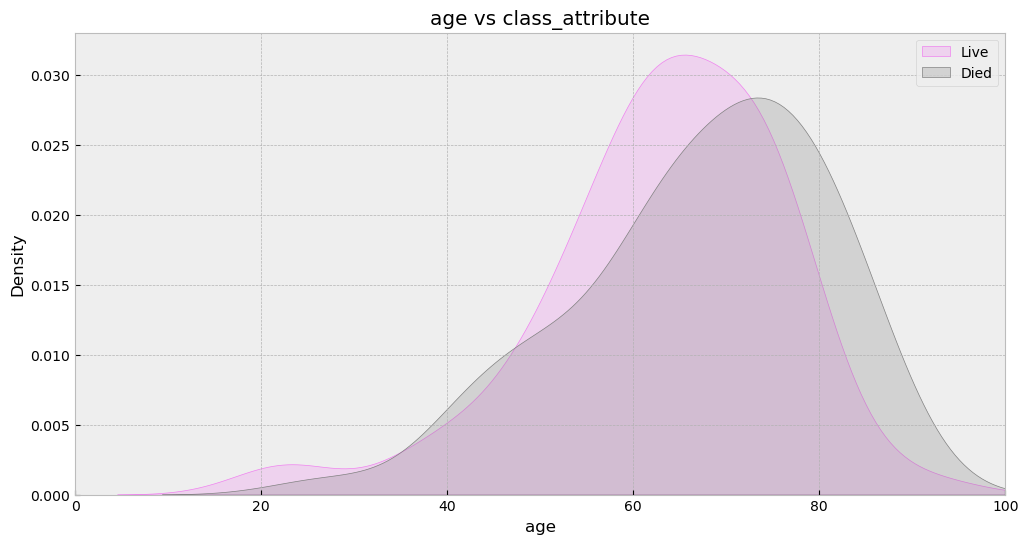

In [9]:
# Plot for Age of patients wrt their class 0,1 (dead , alive)
plt.figure(figsize=(12,6))

sns.kdeplot(data.age[data.class_attribute == 1], color="violet", shade=True)

sns.kdeplot(data.age[data.class_attribute == 0], color="grey", shade=True)

plt.legend(['Live', 'Died'])
plt.title('age vs class_attribute')
plt.xlim(0,100)
plt.show()

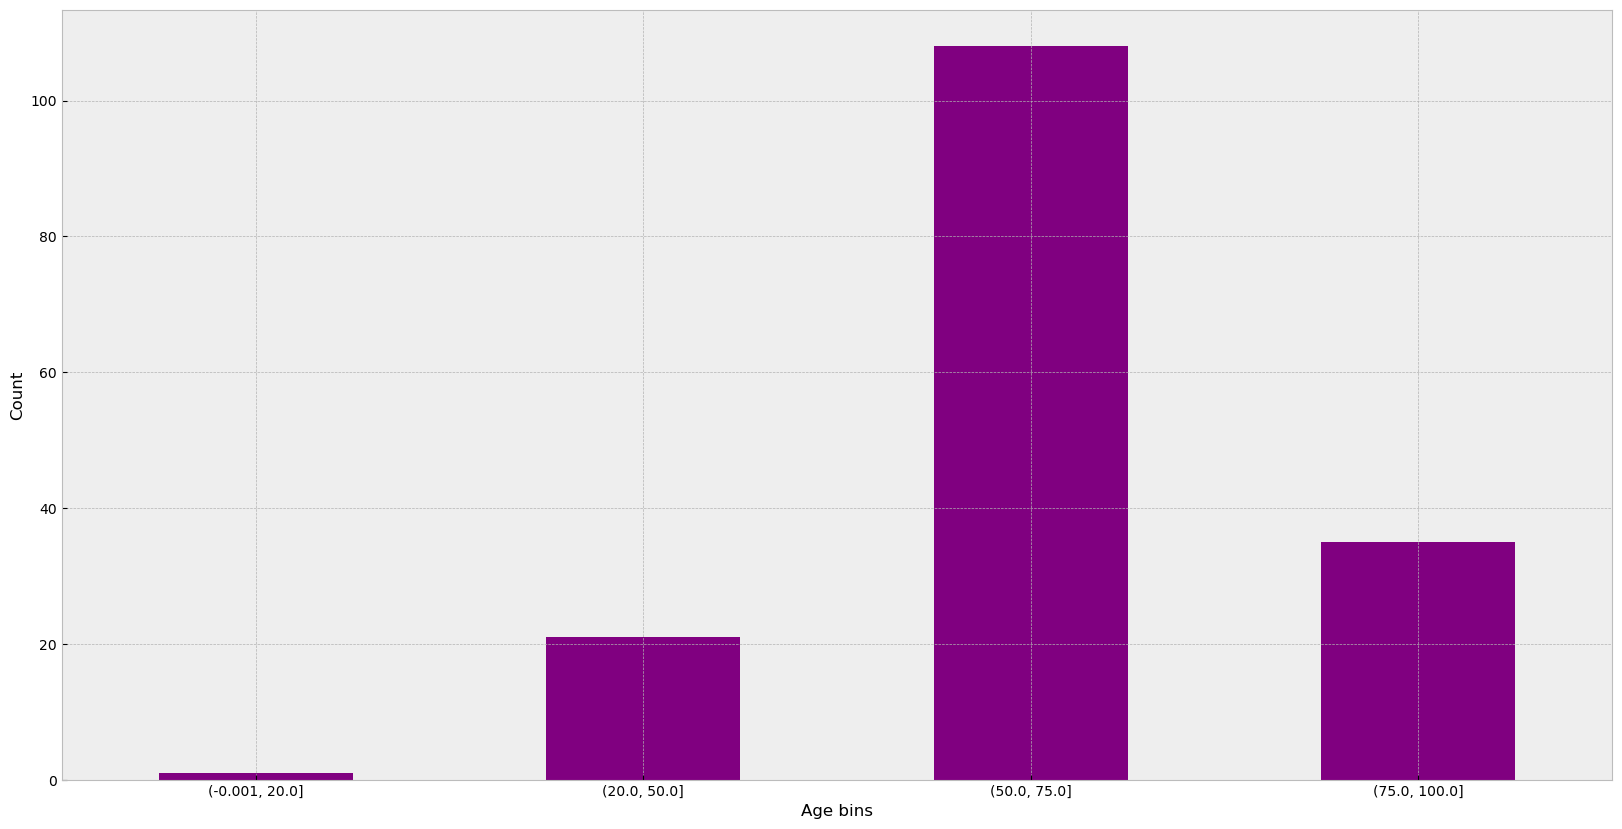

In [25]:
# Visualizing age groups
bins = [0, 20, 50, 75, 100]

out = pd.cut(data.age, bins=bins, include_lowest=True)

age_plot = out.value_counts(sort=False).plot.bar(rot=0, color="purple", figsize=(20,10))

plt.xlabel('Age groups')
plt.ylabel('Count')
plt.show()

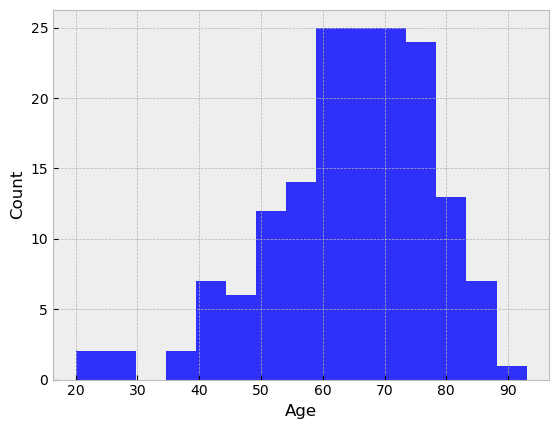

In [11]:
age_plot = data.age.hist(bins=15,color='blue', alpha=0.8)

age_plot.set(xlabel='Age', ylabel='Count')

plt.show()

In [12]:
#Alcohol consumption stats
data['grams_of_alcohol_per_day'].isnull().sum()
print("maximum alcohol consumption per day rate :",max(data["grams_of_alcohol_per_day"]))
print("minimum alcohol consumption per day rate :",min(data["grams_of_alcohol_per_day"]))
print("mean alcohol consumption rate :",data["grams_of_alcohol_per_day"].mean())
print("median alcohol consumption rate :",data["grams_of_alcohol_per_day"].median())

maximum alcohol consumption per day rate : 500.0
minimum alcohol consumption per day rate : 0.0
mean alcohol consumption rate : 71.00854700854701
median alcohol consumption rate : 75.0


C:\Users\AKSHAT\AppData\Local\Temp\ipykernel_29104\2534260876.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.grams_of_alcohol_per_day[data.class_attribute == 1], color="pink", shade=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AKSHAT\AppData\Local\Temp\ipykernel_29104\2534260876.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.grams_of_alcohol_per_day[data.class_attribute == 0], color="Blue", shade=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

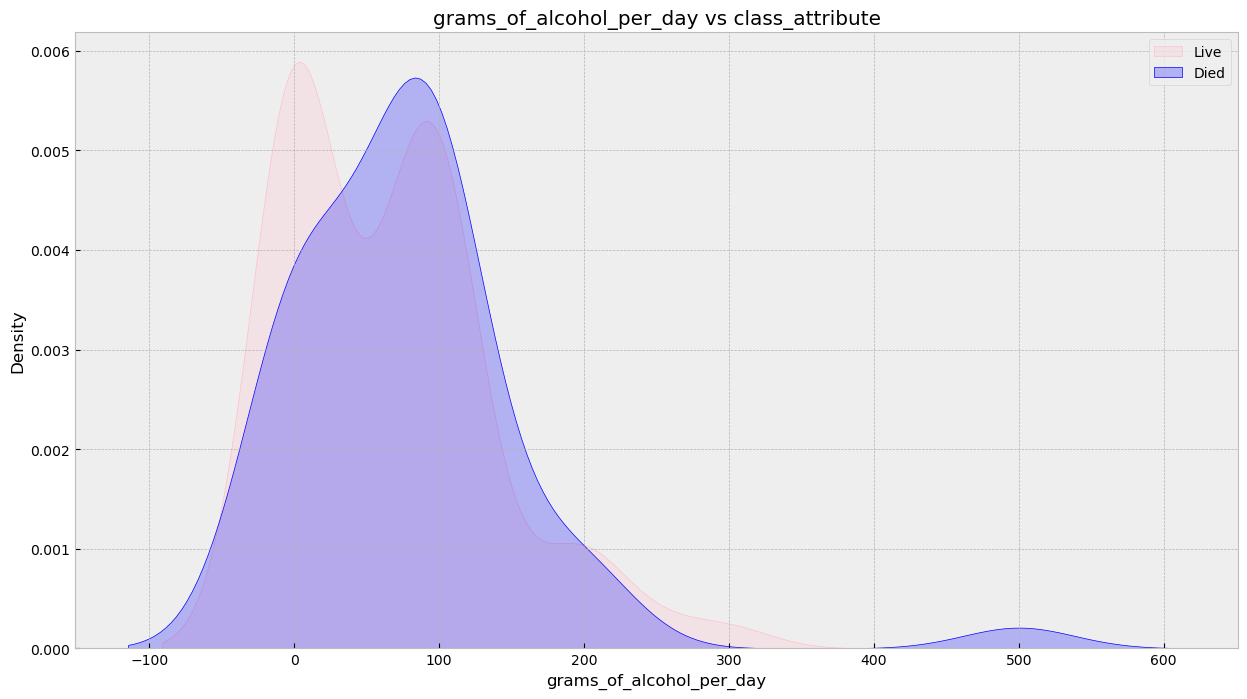

In [13]:
# Alcohol consumption wrt their class 0,1 (died , live)
plt.figure(figsize=(15,8))

sns.kdeplot(data.grams_of_alcohol_per_day[data.class_attribute == 1], color="pink", shade=True)

sns.kdeplot(data.grams_of_alcohol_per_day[data.class_attribute == 0], color="Blue", shade=True)

plt.legend(['Live', 'Died'])
plt.title('grams_of_alcohol_per_day vs class_attribute')
plt.show()


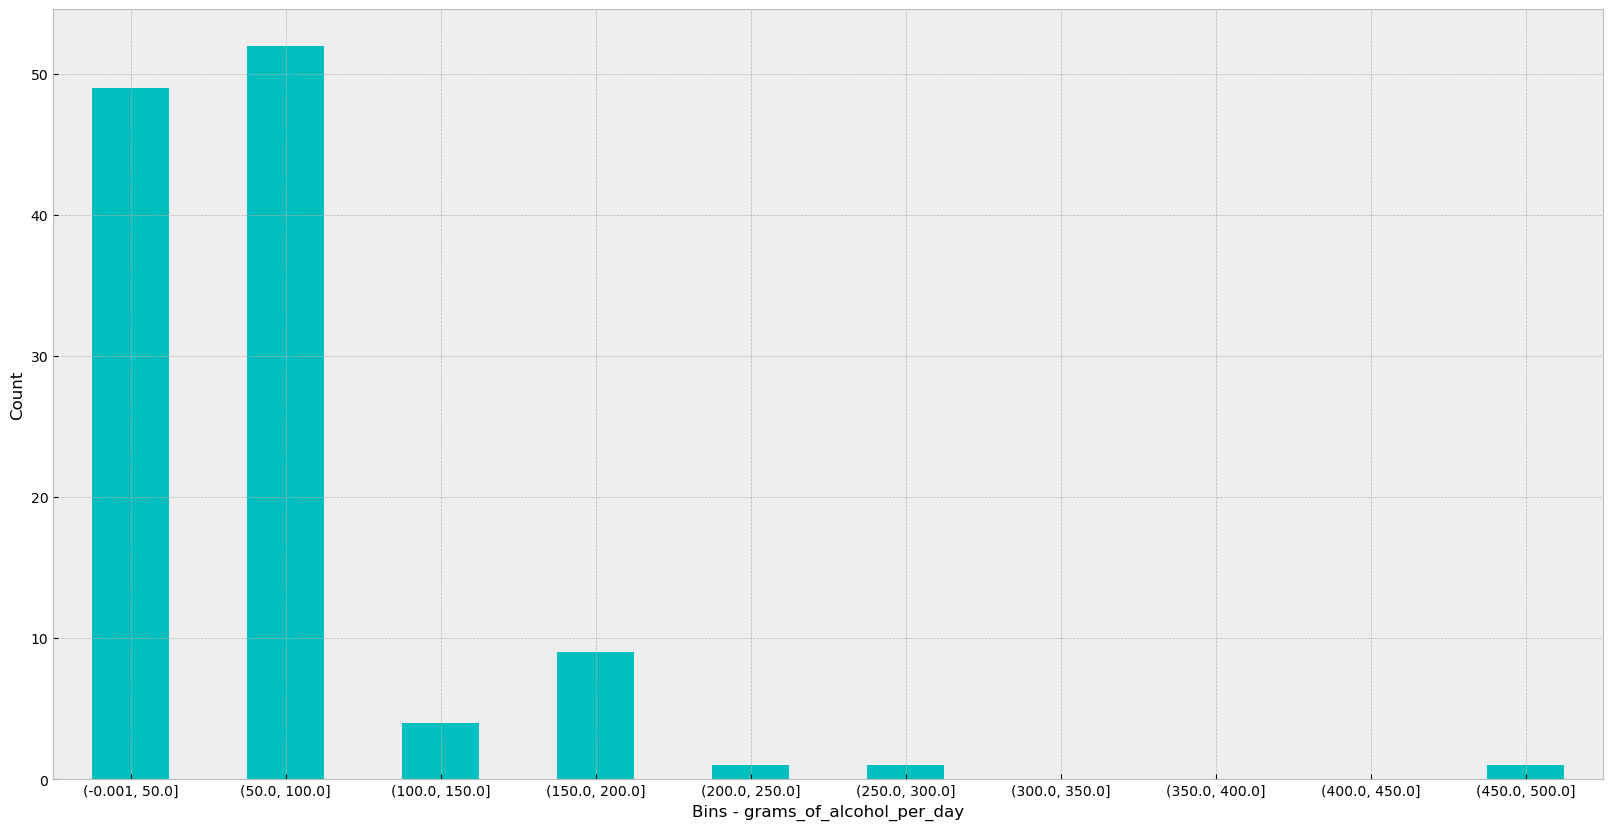

In [14]:
# Chart for alcohol consumption wrt number consumed
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

out = pd.cut(data.grams_of_alcohol_per_day, bins=bins, include_lowest=True)

alcohol_plot = out.value_counts(sort=False).plot.bar(rot=0, color='c', figsize=(20,10))

plt.xlabel('Bins - grams_of_alcohol_per_day')
plt.ylabel('Count')
plt.show()

In [15]:
# Cigarets consumption stats
data['packs_of_cigarets_per_year'].isnull().sum()
print("maximum cigarets consumption per year rate :",max(data['packs_of_cigarets_per_year']))
print("minimum cigarets consumption per year rate :",min(data['packs_of_cigarets_per_year']))
print("mean cigarets consumption per year rate :",data['packs_of_cigarets_per_year'].mean())

maximum cigarets consumption per year rate : 510.0
minimum cigarets consumption per year rate : 0.0
mean cigarets consumption per year rate : 20.464285714285715


C:\Users\AKSHAT\AppData\Local\Temp\ipykernel_31272\2291576632.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["packs_of_cigarets_per_year"][data.class_attribute == 1], color="darkturquoise", shade=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AKSHAT\AppData\Local\Temp\ipykernel_31272\2291576632.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["packs_of_cigarets_per_year"][data.class_attribute == 0], color="lightcoral", shade=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:11

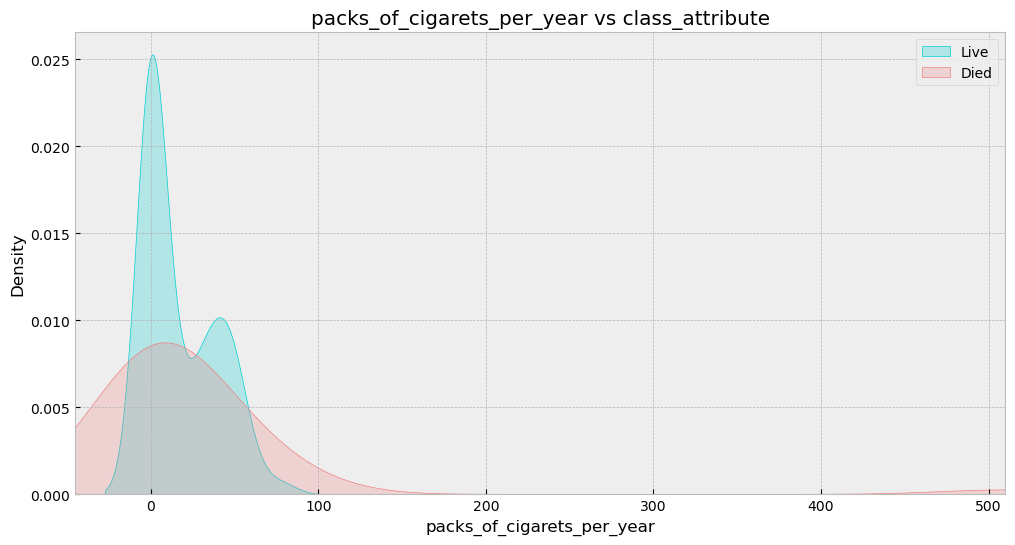

In [37]:
# Cigarets consumption charts
plt.figure(figsize=(12,6))

sns.kdeplot(data["packs_of_cigarets_per_year"][data.class_attribute == 1], color="darkturquoise", shade=True)

sns.kdeplot(data["packs_of_cigarets_per_year"][data.class_attribute == 0], color="lightcoral", shade=True)

plt.legend(['Live', 'Died'])
plt.title('packs_of_cigarets_per_year vs class_attribute')
plt.xlim(-45, 510)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0.5, 1.0, 'Men')

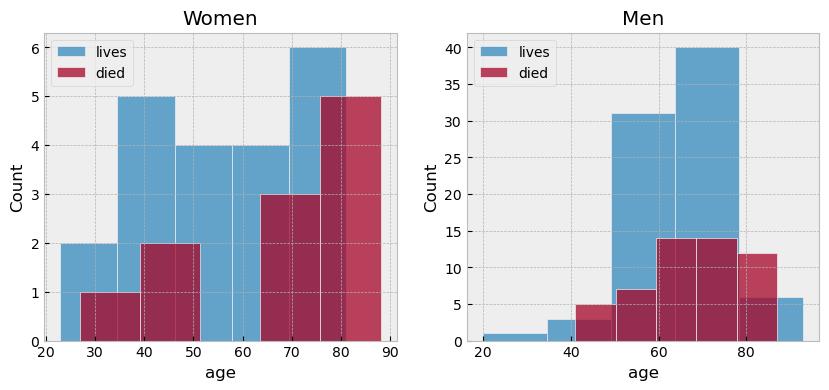

In [16]:
# Gender stats wrt class 0,1 (died, live)

data['class_attribute'].value_counts()

lives = 'lives'
died = 'died'

fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(10, 4))

# 0-women, 1-men
women = data[data['gender'] == 0]
men = data[data['gender'] == 1]

women_plot = sns.histplot(women[women['class_attribute'] == 1].age.dropna(), bins=5, label=lives, ax=axes[0], kde=False)

women_plot = sns.histplot(women[women['class_attribute'] == 0].age.dropna(), bins=5, label=died, ax=axes[0], kde=False)

women_plot.legend()
women_plot.set_title('Women')

men_plot = sns.histplot(men[men['class_attribute'] == 1].age.dropna(), bins=5, label=lives, ax=axes[1], kde=False)

men_plot = sns.histplot(men[men['class_attribute'] == 0].age.dropna(), bins=5, label = died, ax = axes[1], kde = False)

men_plot.legend()
men_plot.set_title('Men')


In [17]:
# Gender stats
data['class_attribute'].isnull().sum()
data['gender'].isnull().sum()
data.groupby(['gender','class_attribute'])['class_attribute'].count()

gender  class_attribute
0       0                  11
        1                  21
1       0                  52
        1                  81
Name: class_attribute, dtype: int64

In [147]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)

percent_of_missing_data = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total_missing_data,  percent_of_missing_data], axis=1, keys=['Total', 'Percent'])

missing_data.head(15)

,Total,Percent
gender,0,0.0
aspartate_transaminase,0,0.0
ascites_degree,0,0.0
international_normalised_ratio,0,0.0
alpha-fetoprotein,0,0.0
haemoglobin,0,0.0
mean_corpuscular_volume,0,0.0
leukocytes,0,0.0
platelets,0,0.0
albumin,0,0.0


In [19]:
cons = data.loc[:, :]
print(cons)

     gender  symptoms  alcohol  hepatitis_b_surface_antigen  \
0         1       0.0        1                          0.0   
1         0       NaN        0                          0.0   
2         1       0.0        1                          1.0   
3         1       1.0        1                          0.0   
4         1       1.0        1                          1.0   
..      ...       ...      ...                          ...   
160       0       0.0        1                          NaN   
161       0       1.0        0                          NaN   
162       1       0.0        1                          0.0   
163       1       0.0        1                          1.0   
164       1       1.0        1                          0.0   

     hepatitis_b_e_antigen  hepatitis_b_core_antibody  \
0                      0.0                        0.0   
1                      0.0                        0.0   
2                      0.0                        1.0   
3              

In [ ]:
# Graph for null val

0       4
1      22
2       0
3       3
4       1
       ..
160    10
161     8
162     9
163     9
164     5
Name: null_values, Length: 165, dtype: int64


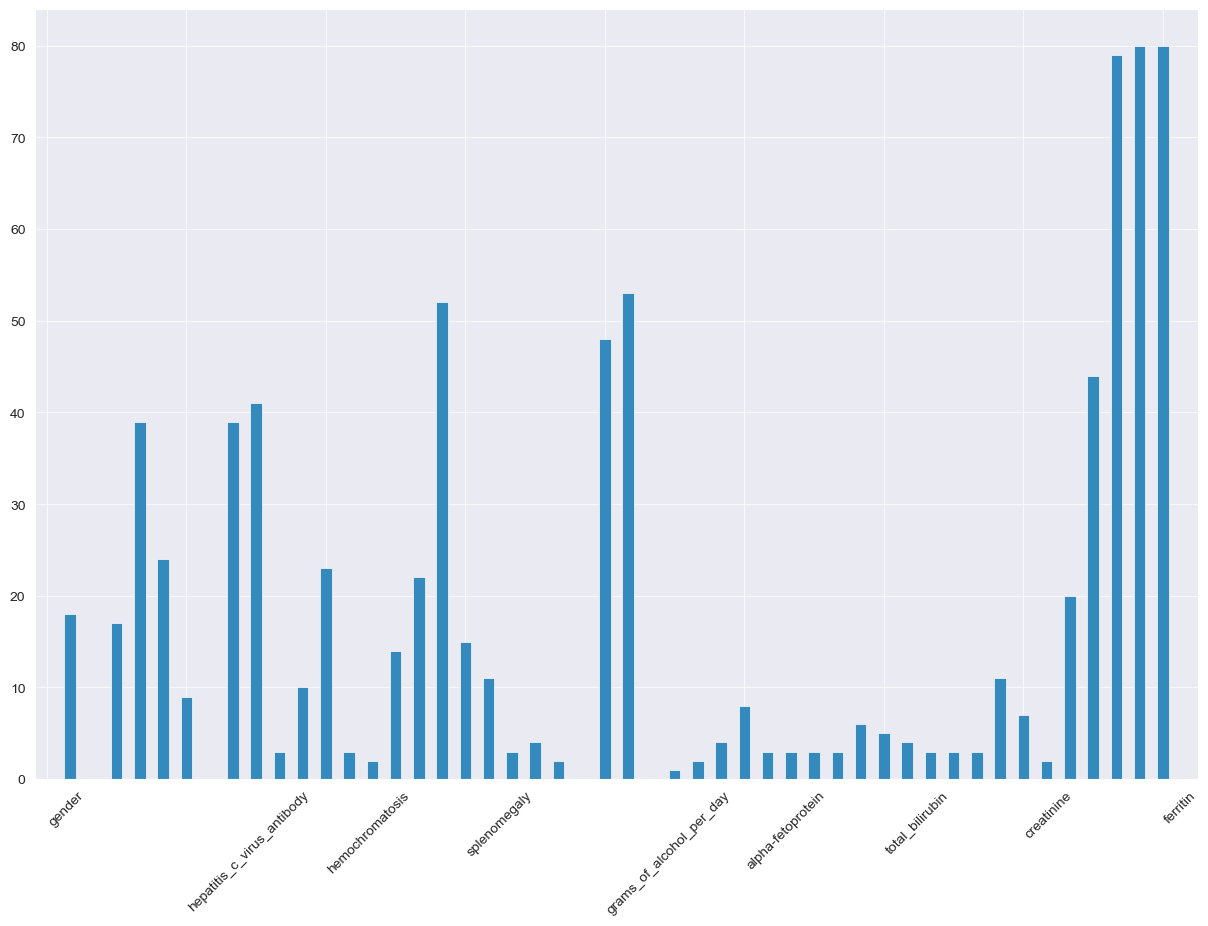

In [20]:
cons['null_values'] = cons.isnull().sum(axis=1)

print(cons['null_values'])

null_values = cons.drop('null_values', axis=1).isnull().sum()

sns.set_style("darkgrid")

plt.figure(figsize=(15,10))

pbar = null_values.plot.bar()

plt.xticks(list(range(0,len(null_values.index),6)), list(null_values.index[0::6]), rotation=45, ha='left')

plt.show()

In [21]:
print(type(null_values))

<class 'pandas.core.series.Series'>


In [22]:
data.groupby('class_attribute').count()

#print(data['null_values'])


#data2 = data.drop(columns=['null_values'])

,gender,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,...,gamma_glutamyl_transferase,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin
class_attribute,,,,,,,,,,,,,,,,,,,,,
0,63,62,63,53,46,50,57,63,48,46,...,63,63,61,61,63,54,48,39,39,40
1,102,85,102,95,80,91,99,102,78,78,...,99,99,93,97,100,91,73,47,46,45


In [ ]:
# Correlation Heatmap

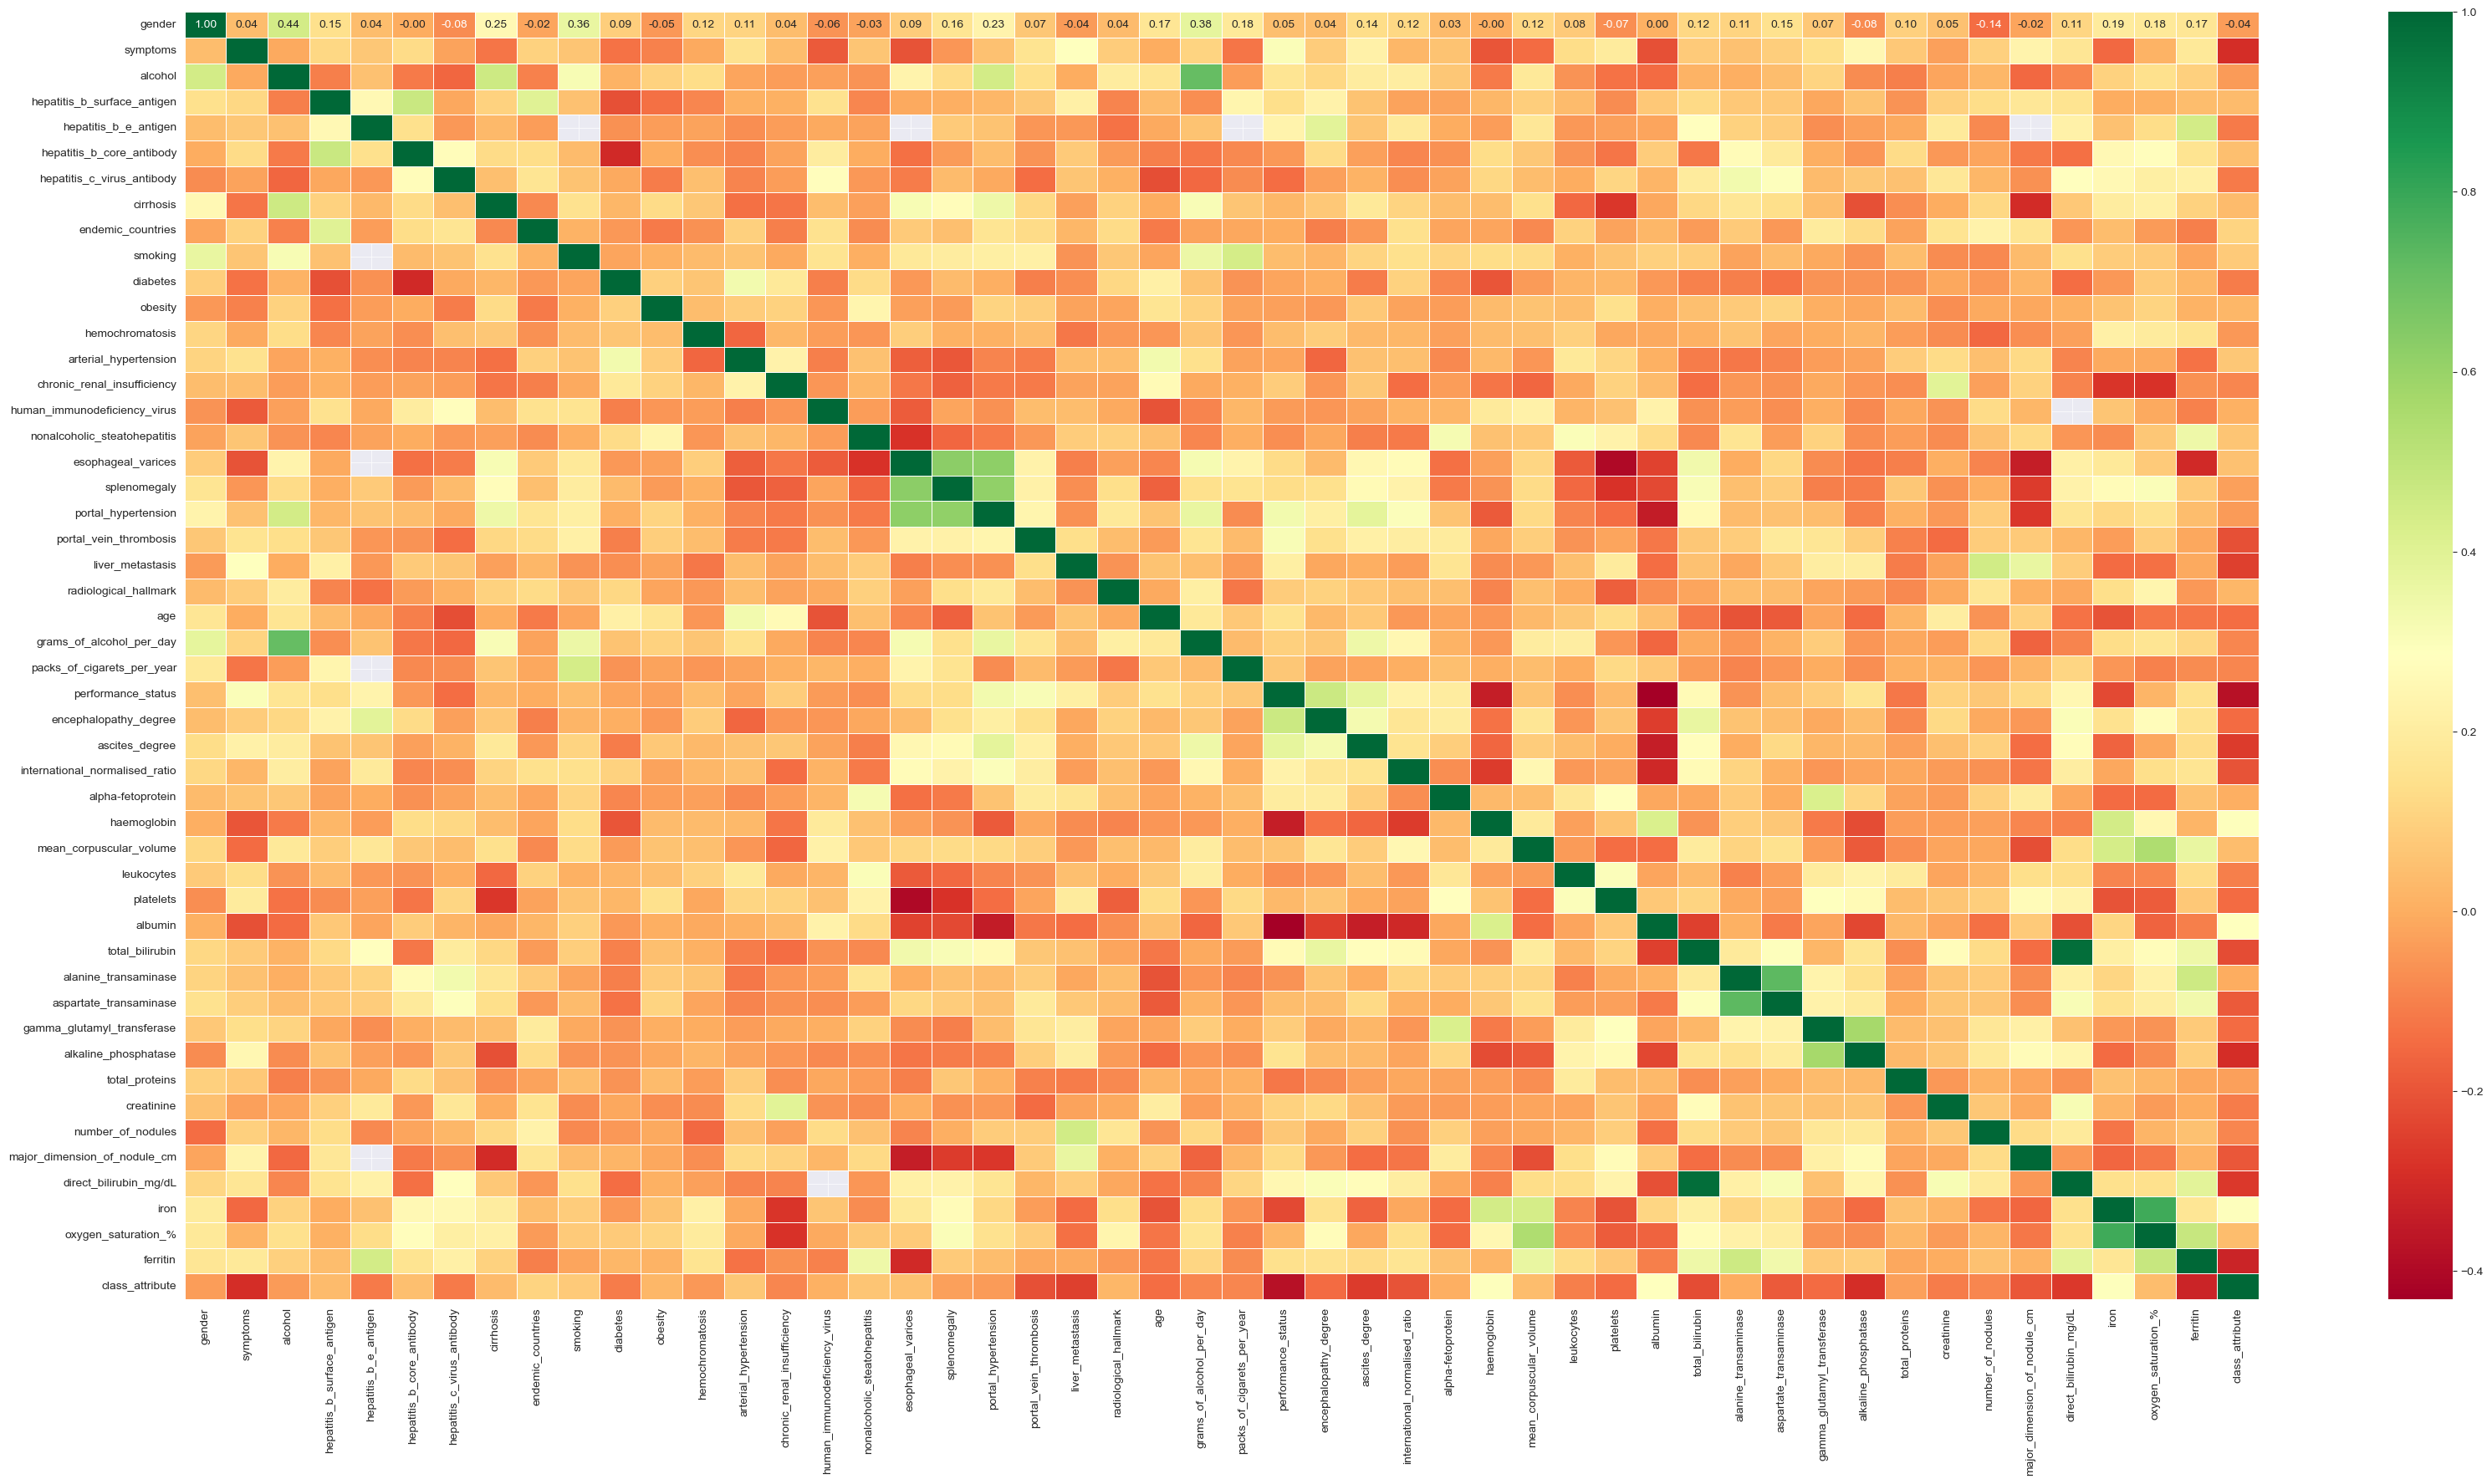

In [23]:
corr = data.corr()

sns.heatmap(data=corr,annot=True, fmt='.2f', linewidths=.5, cmap='RdYlGn', xticklabels=corr.columns.values, yticklabels=corr.columns.values)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()

In [ ]:
# Imputation of nominal values

In [24]:
# Most frequent value for both decision classes outputs - 0,1.
def prepare_missing_values_for_nans(df=None, columns=None):
    
    to_update_nans_dict = {}
    
    if columns:
        for decision_class in [0, 1]:
            for column in columns:
                vals = df[df.class_attribute == decision_class][column].value_counts()
                
                to_update_nans_dict['{decision_class}_{column}'.format(
                    decision_class=decision_class,
                    column=column
                )] = vals.idxmax()
                
        return to_update_nans_dict

In [25]:
#  Replacing NaN with the most frequent values for both classes outputs - 0,1.
def replace_missing_values(df=None, columns=None, to_update_nans_dict=None):  
    df_list = []
    
    if columns:
        for decision_class in [0, 1]:
            _df = df[df.class_attribute == decision_class].reset_index(drop=True)

            for column in columns:        
                _df[column] = _df[column].fillna(
                    to_update_nans_dict['{}_{}'.format(decision_class, column)]
            )

            df_list.append(_df)

        return df_list

In [26]:
# replacing NaNs with the most frequent value in column
nominal_indexes = [1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

nominal_columns_to_discretize = list(itemgetter(*nominal_indexes)(columns))

In [27]:
# prepare missing values
nominal_dict = prepare_missing_values_for_nans( df=data, columns=nominal_columns_to_discretize)

# replace NaN
missing_nominal_values_list = replace_missing_values( df=data, columns=nominal_columns_to_discretize, to_update_nans_dict=nominal_dict)
data = pd.concat(missing_nominal_values_list).reset_index(drop=True)

In [28]:
# Function to replace NaNs
def replace_nan(row, most_frequent, column_name):
    if pd.isna(row[column_name]):
        return most_frequent[row['class_attribute']]
    else:
        return row[column_name]

# Process each column
for column in columns:
    # Find most frequent value for each class in the current column
    most_frequent = data.groupby('class_attribute')[column].apply(lambda x: x.mode()[0] if not x.mode().empty else pd.NA)
    
    # Replace NaN values in the current column
    data[column] = data.apply(lambda row: replace_nan(row, most_frequent, column), axis=1)

print(data)


     gender  symptoms  alcohol  hepatitis_b_surface_antigen  \
0       1.0       1.0      1.0                          0.0   
1       1.0       0.0      1.0                          0.0   
2       1.0       0.0      0.0                          0.0   
3       1.0       1.0      1.0                          0.0   
4       1.0       0.0      1.0                          0.0   
..      ...       ...      ...                          ...   
160     0.0       0.0      0.0                          0.0   
161     1.0       1.0      1.0                          0.0   
162     1.0       1.0      0.0                          0.0   
163     0.0       0.0      1.0                          0.0   
164     1.0       0.0      1.0                          0.0   

     hepatitis_b_e_antigen  hepatitis_b_core_antibody  \
0                      0.0                        0.0   
1                      0.0                        0.0   
2                      0.0                        1.0   
3              

In [29]:
# KNN imputation

continuous_indexes = [24,25,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48]

continuous_columns_to_discretize = list(itemgetter(*continuous_indexes)(columns))

continuous_data = data[continuous_columns_to_discretize].values
print(continuous_data)

[[4.000e+01 3.000e+01 9.500e-01 ... 1.500e+01 1.700e+01 1.400e+01]
 [0.000e+00 0.000e+00 1.580e+00 ... 5.300e+01 2.200e+01 1.110e+02]
 [0.000e+00 0.000e+00 1.400e+00 ... 1.710e+02 1.260e+02 1.452e+03]
 ...
 [0.000e+00 0.000e+00 1.160e+00 ... 9.300e+01 5.600e+01 0.000e+00]
 [0.000e+00 0.000e+00 8.400e-01 ... 9.300e+01 5.600e+01 0.000e+00]
 [0.000e+00 4.800e+01 1.130e+00 ... 9.300e+01 5.600e+01 0.000e+00]]


In [30]:
# method 1 - KNN neighbours
X_filled_knn = KNN(k=3).fit_transform(continuous_data)

data[continuous_columns_to_discretize] = X_filled_knn

X_filled_knn.shape
#print(data)


Imputing row 1/165 with 0 missing, elapsed time: 0.011
Imputing row 101/165 with 0 missing, elapsed time: 0.011


C:\Users\AKSHAT\AppData\Roaming\Python\Python311\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


(165, 21)

In [31]:
integer_columns = ['age', 'number_of_nodules']

# prepare missing integer values
integer_dict = prepare_missing_values_for_nans(df=data, columns=integer_columns)

# replace NaN
missing_integer_values_list = replace_missing_values(df=data, columns=integer_columns, to_update_nans_dict=integer_dict)
data = pd.concat(missing_integer_values_list).reset_index(drop=True)

In [32]:
print(data['ascites_degree'].value_counts())
ordinal_columns = ['encephalopathy_degree', 'ascites_degree', 'performance_status']

ascites_degree
1.0    111
2.0     36
3.0     18
Name: count, dtype: int64


In [33]:
# prepare missing ordinal values
ordinal_dict = prepare_missing_values_for_nans(df=data, columns=ordinal_columns)
print(ordinal_dict)

{'0_encephalopathy_degree': 1.0,
 '0_ascites_degree': 1.0,
 '0_performance_status': 0.0,
 '1_encephalopathy_degree': 1.0,
 '1_ascites_degree': 1.0,
 '1_performance_status': 0.0}

In [34]:
# replace NaN
missing_ordinal_values_list = replace_missing_values(df=data, columns=ordinal_columns, to_update_nans_dict=ordinal_dict)
data = pd.concat(missing_ordinal_values_list).reset_index(drop=True)
data[data.isnull().any(axis=1)]
print(ordinal_columns)

['encephalopathy_degree', 'ascites_degree', 'performance_status']

In [35]:
binarized_data = []

for c in ordinal_columns:
    lb = LabelBinarizer()
    
    lb.fit(data[c].values)
    
    binarized = lb.transform(data[c].values)
    binarized_data.append(binarized)


In [36]:
binarized_ordinal_matrix_data = np.hstack(binarized_data)
binarized_ordinal_matrix_data

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [37]:
# BINARIZING number_of_nodules 

In [38]:
list(set(data.number_of_nodules.values))
lb = LabelBinarizer()

lb.fit(data.number_of_nodules.values)

binarized_number_of_nodules = lb.transform(data.number_of_nodules.values)

In [39]:
# AGE AVERAGING

In [40]:
data['age_'] = data.age.apply(lambda x: x / data.age.max())
data['age_'].head(10)
age_ = data.age_.values.reshape(-1,1)

In [41]:
# HEATMAP AFTER IMPUTATION

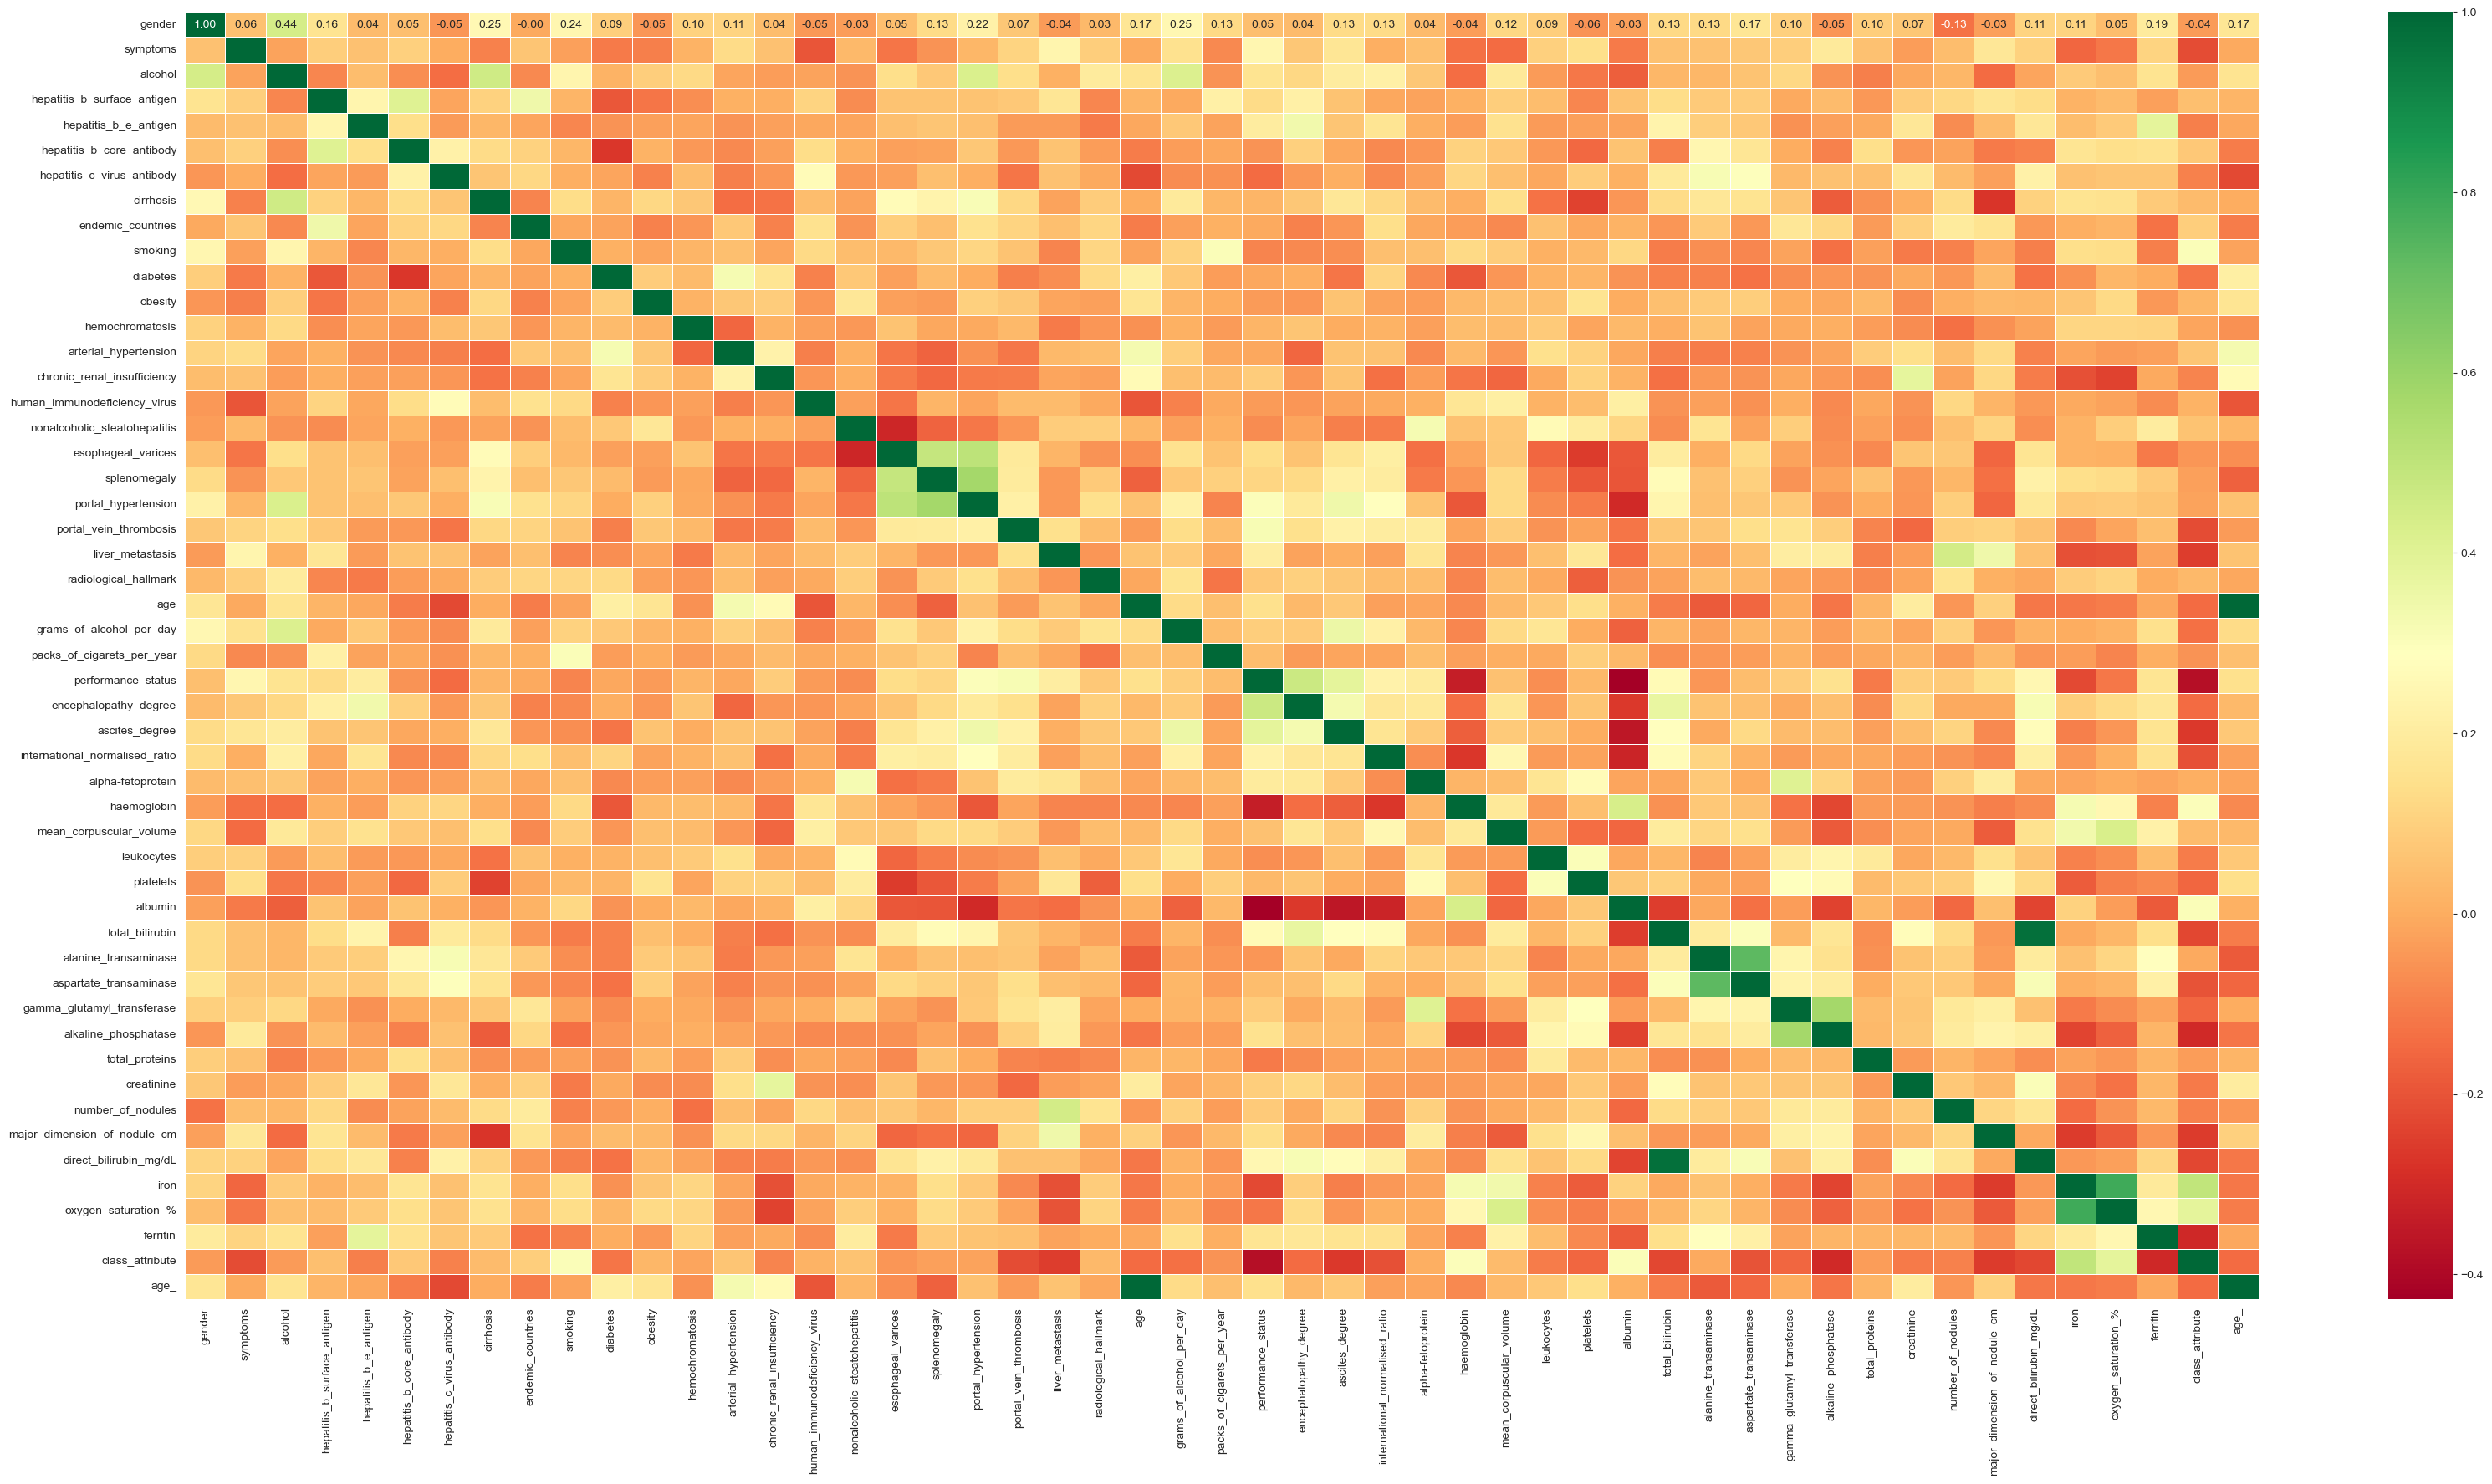

In [42]:
corr = data.corr()

sns.heatmap(data=corr, annot=True, fmt='.2f', linewidths=.5, cmap='RdYlGn', xticklabels=corr.columns.values, yticklabels=corr.columns.values)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()

<Axes: >

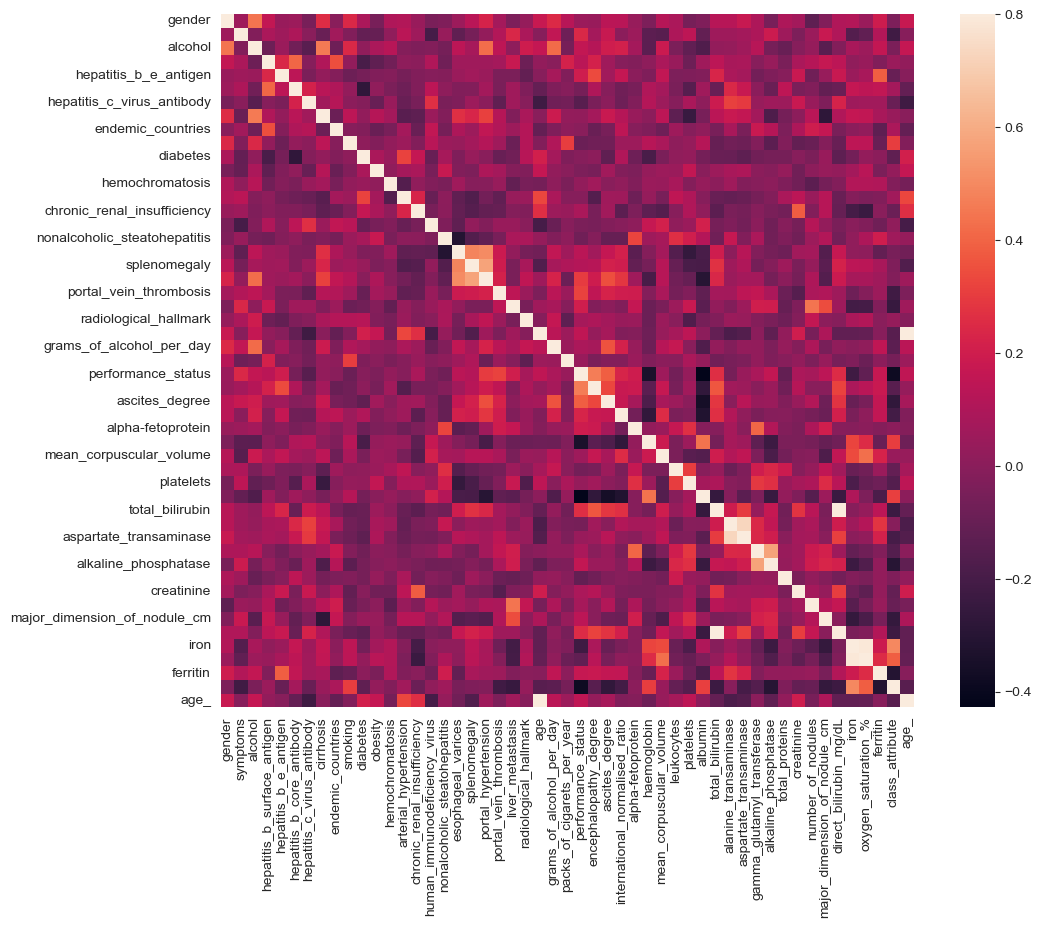

In [43]:
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(data.corr(), vmax=.8, square=True)

In [44]:
to_drop_columns = ['age', 'encephalopathy_degree', 'ascites_degree', 'performance_status', 'number_of_nodules']

columns_set = set(columns)

_columns = list(columns_set.difference(to_drop_columns))
print(len(columns))
print(len(_columns))
X = data[_columns].values
print(X.shape)
y = data.class_attribute.values
print(y)

50
45
(165, 45)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [45]:
X_new = np.hstack((X, binarized_ordinal_matrix_data, age_, binarized_number_of_nodules))
X_new.shape

(165, 63)

In [46]:
# Model training and evaluation of LOGISTIC REGRESSION

In [47]:

std_scaler = StandardScaler() #StandardScaler() # RobustScaler
X_new = std_scaler.fit_transform(X_new)

# SPLITTING DATA INTO TRAIN AND TEST DATASETS
X_train, X_test, y_train, y_test = train_test_split( X_new, y, random_state=42, test_size=0.20)

log_reg = LogisticRegression(solver='lbfgs', random_state=42, C=0.1, multi_class='ovr', penalty='l2',)
log_reg.fit(X_train, y_train)

log_reg_predict = log_reg.predict(X_test)
log_reg.score(X_test, y_test)
preds = log_reg.predict(X_test)

print('\nLogistic Regression Accuracy: {:.2f}%'.format(accuracy_score(y_test, log_reg_predict) * 100))
print('Logistic Regression AUC: {:.2f}%'.format(roc_auc_score(y_test, log_reg_predict) * 100))
print('Logistic Regression Classification report:\n\n', classification_report(y_test, log_reg_predict))
print('confusion matrix : \n',confusion_matrix(y_test, preds))



Logistic Regression Accuracy: 100.00%
Logistic Regression AUC: 100.00%
Logistic Regression Classification report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

confusion matrix : 
 [[14  0]
 [ 0 19]]


In [48]:
# F1 SCORE AFTER 5-FOLD CROSS-VALIDATION¶

In [49]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
predicted = cross_val_predict(log_reg, X_new, y, cv=kfold)
scores = cross_val_score(log_reg, X_new, y, cv=kfold, scoring='f1')

print('Cross-validated scores: {}\n'.format(scores))
print(classification_report(y, predicted))
print("LogisticRegression: F1 after 5-fold cross-validation: {:0.2f}% ".format(scores.mean() * 100, scores.std() * 2))
print(confusion_matrix(y, predicted))

Cross-validated scores: [0.97560976 1.         1.         1.         0.97674419]

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        63
         1.0       0.98      1.00      0.99       102

    accuracy                           0.99       165
   macro avg       0.99      0.98      0.99       165
weighted avg       0.99      0.99      0.99       165

LogisticRegression: F1 after 5-fold cross-validation: 99.05% 
[[ 61   2]
 [  0 102]]


In [66]:
from sklearn.metrics import matthews_corrcoef, log_loss, cohen_kappa_score

In [69]:
# Calculate Log Loss
log_loss_value = log_loss(y, predicted)
print(f"Logarithmic Loss: {log_loss_value}")

# Calculate MCC
mcc = matthews_corrcoef(y, predicted)
print(f"Matthews Correlation Coefficient: {mcc}")

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y, predicted)
print(f"Cohen's Kappa: {kappa}")

Logarithmic Loss: 0.4368927683529354
Matthews Correlation Coefficient: 0.9744915082409388
Cohen's Kappa: 0.9741662752465946


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 